In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
stats.uniform?

In [3]:
# Let's set the parameter b
b = 2
# Define a range of the independent variable
x = np.linspace(0,100,num=10000)

Below we'll plot the Pareto probability density function with default loc and scale, i.e., in the standard form.  Remember this distribution is given by
\begin{equation}
P_{standard}(x; b) = b x^{-(b+1)}
\end{equation}
Notice that if we make our choice $b=2$, then changing $x$ from 1 to 10 will change $P(x)$ by *1000*!  Clearly, plotting this on linear axes is going to make it hard to see.  Further, since the distribution is a power law, we expect that it is a straight line on a log-log plot, so let's plot it that way.  Notice that the distribution function is zero for $x < 1$.

Let's plot a histogram of one "realization" (on particular set of draws of random numbers) from this distribution, along with the probability density function.

In [9]:
rvs = stats.pareto.rvs(b, size=1000)

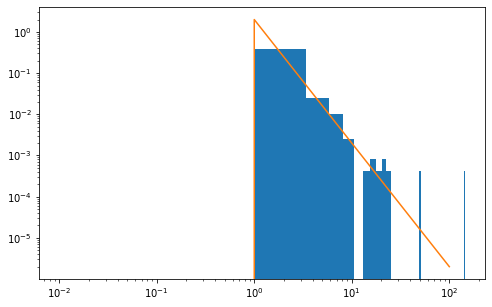

In [10]:
plt.figure(figsize=(8,5))
plt.hist(rvs, density=True, bins=60)
plt.loglog(x, stats.pareto.pdf(x, b))
plt.show()

We can check that this is a properly normalized PDF by integrating it numerically. `np.trapz(y, x=x)` uses the *trapezoidal rule* to numerically integrate the values `y`, though of as a function $y(x)$ with corresponding independent variable $x$.  If the `x` values run from $x_{min}$ to $x_{max}$, the mathematical expression that `trapz` is trying to approximate is
\begin{equation}
\int_{x_{min}}^{x_{max}} y(x) dx
\end{equation}
Note that below, `x` starts at 0, but that's OK, because the function is zero there, too.

In [11]:
print(np.trapz(stats.pareto.pdf(x, b), x=x))

1.0097479984338331


That's pretty close to 1, and we could do better by increasing the maximum of the range to larger values ("closer to infinity"), or adding more points to `linspace`.

Now let's see what the `loc` and `scale` keywords do.  Using the syntax below and scrolling down, we find the following statement:

`The probability density above is defined in the "standardized" form. To shift and/or scale the distribution use the ``loc`` and ``scale`` parameters.
Specifically, ``pareto.pdf(x, b, loc, scale)`` is identically equivalent to ``pareto.pdf(y, b) / scale`` with ``y = (x - loc) / scale``.`

What does that mean?

It means that if we write `loc` as $L$ and scale as $S$, the new probabilty density function is
\begin{eqnarray}
P(x; b, L, S) & = & \frac{1}{S} P_{standard}\left( \frac{x-L}{S}; b \right) \\
 & = & \frac{b}{S} \frac{S^{b+1}}{(x-L)^{b+1}} \\
 & = & \frac{b S^{b}}{(x-L)^{b+1}}
\end{eqnarray}
Importantly, this function is *zero* for
\begin{equation}
\frac{x - L}{S} < 1
\end{equation}

Let's see what these scaled distributions look like.

In [10]:
stats.pareto?

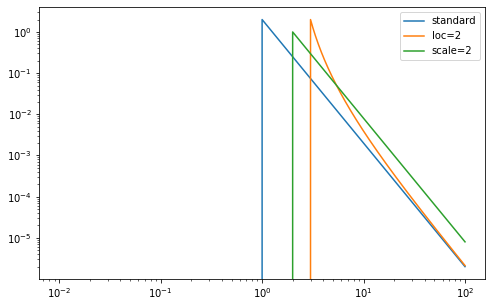

In [12]:
# Plot the Pareto with default loc and scale
plt.figure(figsize=(8,5))
plt.loglog(x, stats.pareto.pdf(x, b), label='standard')
plt.loglog(x, stats.pareto.pdf(x, b, loc=2), label='loc=2') 
plt.loglog(x, stats.pareto.pdf(x, b, scale=2), label='scale=2')
plt.legend()
plt.show()

Now, notice that that the new distributions are still properly normalized (to our ability to tell with numerical integration, which of course is not a proof):

In [13]:
print(np.trapz(stats.pareto.pdf(x, b, loc=2), x=x))
print(np.trapz(stats.pareto.pdf(x, b, scale=2), x=x))

1.0093380387204867
1.0044115074439812


But notice that changing `loc` leads to distribution which is not a simple power law any more: it's not a straight line on the log-log plot.  Now `scale` looks more promising ... 